In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import TruncatedSVD
from scipy.stats import randint as sp_randint

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
test = pd.read_csv("../Data/test.csv").set_index('id')
train = pd.read_csv("../Data/train.csv").set_index('id')

In [16]:
y_train = train.duration.values
X_train = train.drop('duration',axis=1)

In [17]:
x_test = test.copy()

In [18]:
imputer = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
X_train = imputer.fit_transform(X_train)

In [19]:
imputer = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
x_test = imputer.fit_transform(x_test)

In [20]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) # devuelve una matriz
x_test = scaler.transform(x_test)

In [21]:
X_train = preprocessing.normalize(X_train,norm='l1')
x_test = preprocessing.normalize(x_test,norm='l1')

In [ ]:
U,E,V = np.linalg.svd(X_train,full_matrices=0)

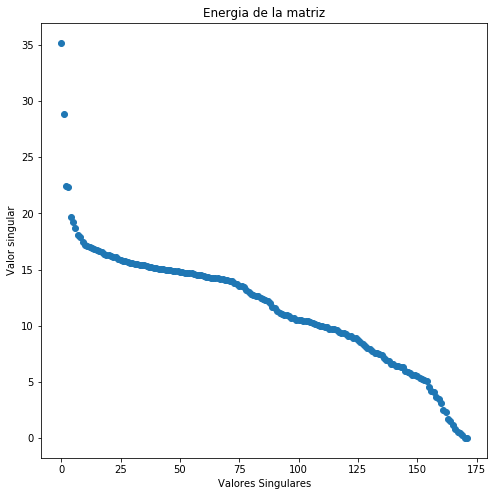

In [38]:
plt.figure(figsize=(8,8))
plt.xlabel("Valores Singulares")
plt.ylabel('Valor singular')
plt.title("Energia de la matriz")
plt.plot(E, "o")
plt.show()

In [22]:
def Energia(E):
    return sum([e ** 2 for e in E])

def ParticipacionEnLaEnergia(cant_val, E):
    return Energia(E[0:cant_val]) / Energia(E)

In [35]:
ParticipacionEnLaEnergia(120, E)

0.93070384074982149

In [9]:
svd = TruncatedSVD(n_components=120,n_iter=7, random_state=42)
x_train_k = svd.fit_transform(X_train)

In [10]:
svd = TruncatedSVD(n_components=120, n_iter=7, random_state=42)
x_test_k = svd.fit_transform(x_test)

### Random Forest

In [43]:
Xtrain, Xval,ytrain, yval = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [10]:
randomForest = RandomForestRegressor()
randomForest = randomForest.fit(Xtrain, ytrain)
randomForest.score(Xval, yval)

0.90519012141309374

In [48]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=9, min_samples_split=9,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [45]:
# max_depth -> None
# max_features -> 10
# min_samples_leaf=9
# min_samples_split=9,
param_grid = {"max_features": ['auto','sqrt','log2'],
              "bootstrap": [True, False]}

reg = RandomForestRegressor(max_depth=None,min_samples_leaf=9, min_samples_split=9)

grid_search = GridSearchCV(reg, param_grid=param_grid, verbose=5, cv = 2)

In [47]:
print(grid_search.best_params_)

{'max_features': 'auto', 'bootstrap': True}


In [11]:
#Hay una clara diferencia entre el score inicial de 0.52 y los subiguietnes por lo que estimo que
#hay un error en el primer random search, vamos a probar un grid search sobre "min_samples_split" 
#y "min_samples_leaf"

# Busqueda de Hiper Parametros
param_grid = {"min_samples_split": [2, 6],"min_samples_leaf": [1,3]}

clf = RandomForestRegressor()

random_search = GridSearchCV(clf, param_grid=param_grid,verbose=5, cv=2)

In [12]:
random_search.fit(Xtrain, ytrain)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] min_samples_split=2, min_samples_leaf=1 .........................
[CV]  min_samples_split=2, min_samples_leaf=1, score=0.862494, total=21.7min
[CV] min_samples_split=2, min_samples_leaf=1 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.7min remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=1, score=0.882834, total=22.1min
[CV] min_samples_split=6, min_samples_leaf=1 .........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 43.8min remaining:    0.0s


[CV]  min_samples_split=6, min_samples_leaf=1, score=0.864474, total=21.1min
[CV] min_samples_split=6, min_samples_leaf=1 .........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 65.0min remaining:    0.0s


[CV]  min_samples_split=6, min_samples_leaf=1, score=0.882901, total=20.7min
[CV] min_samples_split=2, min_samples_leaf=3 .........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 85.7min remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=3, score=0.870810, total=19.5min
[CV] min_samples_split=2, min_samples_leaf=3 .........................
[CV]  min_samples_split=2, min_samples_leaf=3, score=0.891074, total=20.3min
[CV] min_samples_split=6, min_samples_leaf=3 .........................
[CV]  min_samples_split=6, min_samples_leaf=3, score=0.871089, total=19.4min
[CV] min_samples_split=6, min_samples_leaf=3 .........................
[CV]  min_samples_split=6, min_samples_leaf=3, score=0.890703, total=20.1min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 165.0min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 6], 'min_samples_leaf': [1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=5)

In [15]:
best_random_forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [16]:
best_random_forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [20]:
y_pred = best_random_forest.predict(x_test)

In [69]:
y_pred_random_forest = best_random_forest.predict(x_test_k)

### XGBoost

In [11]:
Xtrain, Xval, ytrain, yval = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
xboost_reg = XGBRegressor(n_estimators=30, seed=25)
xboost_reg = xboost_reg.fit(Xtrain, ytrain)
xboost_reg.score(Xval, yval)

0.42892569407796233

In [12]:
xboost_reg = XGBRegressor(n_estimators=30, seed=25)
gsearch_max_depth = GridSearchCV(xboost_reg,param_grid = {'max_depth':[3,5,10]}, cv=2, verbose=5)
gsearch_max_depth = gsearch_max_depth.fit(Xtrain, ytrain)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] max_depth=3 .....................................................
[CV] ...................... max_depth=3, score=0.427239, total=  44.6s
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.0s remaining:    0.0s


[CV] ...................... max_depth=3, score=0.442231, total=  46.0s
[CV] max_depth=5 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV] ...................... max_depth=5, score=0.627600, total= 1.2min
[CV] max_depth=5 .....................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.8min remaining:    0.0s


[CV] ...................... max_depth=5, score=0.636061, total= 1.2min
[CV] max_depth=10 ....................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.0min remaining:    0.0s


[CV] ..................... max_depth=10, score=0.825808, total= 2.5min
[CV] max_depth=10 ....................................................
[CV] ..................... max_depth=10, score=0.836070, total= 2.6min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  9.1min finished


In [13]:
xboost_reg = XGBRegressor(n_estimators=30, seed=25)
gsearch_max_depth_2 = GridSearchCV(xboost_reg,param_grid = {'max_depth':[8,10,12]}, cv=2, verbose=5)
gsearch_max_depth_2 = gsearch_max_depth_2.fit(Xtrain, ytrain)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] max_depth=8 .....................................................
[CV] ...................... max_depth=8, score=0.781394, total= 1.9min
[CV] max_depth=8 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[CV] ...................... max_depth=8, score=0.798269, total= 1.9min
[CV] max_depth=10 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.9min remaining:    0.0s


[CV] ..................... max_depth=10, score=0.825808, total= 2.5min
[CV] max_depth=10 ....................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.4min remaining:    0.0s


[CV] ..................... max_depth=10, score=0.836070, total= 2.3min
[CV] max_depth=12 ....................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.7min remaining:    0.0s


[CV] ..................... max_depth=12, score=0.846738, total= 2.7min
[CV] max_depth=12 ....................................................
[CV] ..................... max_depth=12, score=0.865626, total= 2.8min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 14.3min finished


In [16]:
xboost_reg = XGBRegressor(n_estimators=30, seed=25)
gsearch_max_depth_3 = GridSearchCV(xboost_reg,param_grid = {'max_depth':[12, 14, 16]}, cv=2, verbose=5)
gsearch_max_depth_3 = gsearch_max_depth_3.fit(Xtrain, ytrain)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] max_depth=12 ....................................................
[CV] ..................... max_depth=12, score=0.846738, total= 2.6min
[CV] max_depth=12 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min remaining:    0.0s


[CV] ..................... max_depth=12, score=0.865626, total= 2.6min
[CV] max_depth=14 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.2min remaining:    0.0s


[CV] ..................... max_depth=14, score=0.862965, total= 3.0min
[CV] max_depth=14 ....................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.2min remaining:    0.0s


[CV] ..................... max_depth=14, score=0.875889, total= 3.0min
[CV] max_depth=16 ....................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 11.3min remaining:    0.0s


[CV] ..................... max_depth=16, score=0.869063, total= 3.5min
[CV] max_depth=16 ....................................................
[CV] ..................... max_depth=16, score=0.885986, total= 3.5min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 18.3min finished


In [14]:
xboost_reg = XGBRegressor(n_estimators=30, seed=25)
gsearch = GridSearchCV(xboost_reg,param_grid = {'min_child_weight':[1,3,6]}, cv=3, verbose=5)
gsearch = gsearch.fit(Xtrain, ytrain)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] min_child_weight=1 ..............................................
[CV] ............... min_child_weight=1, score=0.440381, total=  57.7s
[CV] min_child_weight=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.3s remaining:    0.0s


[CV] ............... min_child_weight=1, score=0.423370, total=  57.1s
[CV] min_child_weight=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


[CV] ............... min_child_weight=1, score=0.433511, total= 1.0min
[CV] min_child_weight=3 ..............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.0min remaining:    0.0s


[CV] ............... min_child_weight=3, score=0.431600, total= 1.0min
[CV] min_child_weight=3 ..............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.0min remaining:    0.0s


[CV] ............... min_child_weight=3, score=0.423715, total= 1.1min
[CV] min_child_weight=3 ..............................................
[CV] ............... min_child_weight=3, score=0.433526, total=  59.8s
[CV] min_child_weight=6 ..............................................
[CV] ............... min_child_weight=6, score=0.431603, total=  57.5s
[CV] min_child_weight=6 ..............................................
[CV] ............... min_child_weight=6, score=0.423358, total= 1.0min
[CV] min_child_weight=6 ..............................................
[CV] ............... min_child_weight=6, score=0.433526, total= 1.0min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  9.2min finished


In [56]:
xboost_reg = XGBRegressor(n_estimators=30, seed=25,max_depth=16, min_child_weight=1)
gsearch_gamma = GridSearchCV(xboost_reg,param_grid = {'gamma':[i/10.0 for i in range(0,5)]}, cv=3, verbose=1)
gsearch_gamma = gsearch_gamma.fit(Xtrain, ytrain)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 94.7min finished


In [57]:
gsearch_gamma.best_params_

{'gamma': 0.4}

In [61]:
xboost_reg = XGBRegressor(n_estimators=30, seed=25,max_depth=16, min_child_weight=1)
gsearch_subsample = GridSearchCV(xboost_reg,param_grid ={'subsample':[i/10.0 for i in range(6,10)]},cv=3, verbose=4)
gsearch_subsample = gsearch_subsample.fit(Xtrain, ytrain)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] subsample=0.6 ...................................................
[CV] .................... subsample=0.6, score=0.869055, total= 5.3min
[CV] subsample=0.6 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.3min remaining:    0.0s


[CV] .................... subsample=0.6, score=0.884310, total= 5.2min
[CV] subsample=0.6 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 10.6min remaining:    0.0s


[CV] .................... subsample=0.6, score=0.890332, total= 4.9min
[CV] subsample=0.7 ...................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 15.5min remaining:    0.0s


[CV] .................... subsample=0.7, score=0.875779, total= 5.2min
[CV] subsample=0.7 ...................................................
[CV] .................... subsample=0.7, score=0.882491, total= 4.8min
[CV] subsample=0.7 ...................................................
[CV] .................... subsample=0.7, score=0.889940, total= 4.4min
[CV] subsample=0.8 ...................................................
[CV] .................... subsample=0.8, score=0.877135, total= 4.9min
[CV] subsample=0.8 ...................................................
[CV] .................... subsample=0.8, score=0.888374, total= 5.3min
[CV] subsample=0.8 ...................................................
[CV] .................... subsample=0.8, score=0.894517, total= 5.1min
[CV] subsample=0.9 ...................................................
[CV] .................... subsample=0.9, score=0.874670, total= 4.8min
[CV] subsample=0.9 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 59.7min finished


In [63]:
gsearch_subsample.best_params_

{'subsample': 0.9}

In [65]:
xboost_reg = XGBRegressor(n_estimators=30, seed=25,max_depth=16, min_child_weight=1, gamma=0.4, subsample=0.9)
gsearch_colsample_bytree = GridSearchCV(xboost_reg,param_grid ={'colsample_bytree':[i/10.0 for i in range(6,10)]},cv=3, verbose=4)
gsearch_colsample_bytree = gsearch_colsample_bytree.fit(Xtrain, ytrain)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] colsample_bytree=0.6 ............................................
[CV] ............. colsample_bytree=0.6, score=0.868684, total= 3.4min
[CV] colsample_bytree=0.6 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s


[CV] ............. colsample_bytree=0.6, score=0.802136, total= 4.0min
[CV] colsample_bytree=0.6 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.5min remaining:    0.0s


[CV] ............. colsample_bytree=0.6, score=0.805225, total= 5.7min
[CV] colsample_bytree=0.7 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 13.2min remaining:    0.0s


[CV] ............. colsample_bytree=0.7, score=0.868365, total= 4.3min
[CV] colsample_bytree=0.7 ............................................
[CV] ............. colsample_bytree=0.7, score=0.817621, total= 3.5min
[CV] colsample_bytree=0.7 ............................................
[CV] ............. colsample_bytree=0.7, score=0.827185, total= 3.4min
[CV] colsample_bytree=0.8 ............................................
[CV] ............. colsample_bytree=0.8, score=0.871348, total= 3.9min
[CV] colsample_bytree=0.8 ............................................
[CV] ............. colsample_bytree=0.8, score=0.859760, total= 3.9min
[CV] colsample_bytree=0.8 ............................................
[CV] ............. colsample_bytree=0.8, score=0.864390, total= 4.0min
[CV] colsample_bytree=0.9 ............................................
[CV] ............. colsample_bytree=0.9, score=0.885919, total= 4.4min
[CV] colsample_bytree=0.9 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 49.6min finished


In [68]:
gsearch_colsample_bytree.best_params_

{'colsample_bytree': 0.9}

In [69]:
xboost_reg = XGBRegressor(n_estimators=30, colsample_bytree=0.9, seed=25,max_depth=16, min_child_weight=1, gamma=0.4, subsample=0.9)
gsearch_rep_alpha = GridSearchCV(xboost_reg,param_grid ={'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]},cv=2, verbose=4)
gsearch_rep_alpha = gsearch_rep_alpha.fit(Xtrain, ytrain)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] reg_alpha=1e-05 .................................................
[CV] .................. reg_alpha=1e-05, score=0.872813, total= 4.0min
[CV] reg_alpha=1e-05 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min remaining:    0.0s


[CV] .................. reg_alpha=1e-05, score=0.886462, total= 3.9min
[CV] reg_alpha=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.9min remaining:    0.0s


[CV] ................... reg_alpha=0.01, score=0.872813, total= 3.8min
[CV] reg_alpha=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 11.7min remaining:    0.0s


[CV] ................... reg_alpha=0.01, score=0.886460, total= 4.0min
[CV] reg_alpha=0.1 ...................................................
[CV] .................... reg_alpha=0.1, score=0.872929, total= 4.4min
[CV] reg_alpha=0.1 ...................................................
[CV] .................... reg_alpha=0.1, score=0.882337, total= 4.3min
[CV] reg_alpha=1 .....................................................
[CV] ...................... reg_alpha=1, score=0.873236, total= 4.3min
[CV] reg_alpha=1 .....................................................
[CV] ...................... reg_alpha=1, score=0.883547, total= 3.9min
[CV] reg_alpha=100 ...................................................
[CV] .................... reg_alpha=100, score=0.870343, total= 3.9min
[CV] reg_alpha=100 ...................................................
[CV] .................... reg_alpha=100, score=0.885553, total= 4.2min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 41.0min finished


In [70]:
gsearch_rep_alpha.best_params_

{'reg_alpha': 1e-05}

In [71]:
grid ={
       'n_estimators':[10, 60, 100],
       'learning_rate': [0.1, 0.01, 0.001]
      }
xboost_reg = XGBRegressor(reg_alpha = 1e-05, colsample_bytree=0.9, seed=25,max_depth=16, min_child_weight=1, gamma=0.4, subsample=0.9)
gsearch_rep_alpha = GridSearchCV(xboost_reg,param_grid=grid,cv=2, verbose=5)
gsearch_rep_alpha = gsearch_rep_alpha.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] n_estimators=10, learning_rate=0.1 ..............................
[CV]  n_estimators=10, learning_rate=0.1, score=0.608121, total= 1.5min
[CV] n_estimators=10, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV]  n_estimators=10, learning_rate=0.1, score=0.631821, total= 1.4min
[CV] n_estimators=60, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.0min remaining:    0.0s


[CV]  n_estimators=60, learning_rate=0.1, score=0.908995, total= 8.6min
[CV] n_estimators=60, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 11.6min remaining:    0.0s


[CV]  n_estimators=60, learning_rate=0.1, score=0.832609, total= 8.6min
[CV] n_estimators=100, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 20.3min remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.1, score=0.914832, total=14.2min
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV]  n_estimators=100, learning_rate=0.1, score=0.835763, total=15.2min
[CV] n_estimators=10, learning_rate=0.01 .............................
[CV]  n_estimators=10, learning_rate=0.01, score=-0.241593, total= 1.4min
[CV] n_estimators=10, learning_rate=0.01 .............................
[CV]  n_estimators=10, learning_rate=0.01, score=-0.259990, total= 1.4min
[CV] n_estimators=60, learning_rate=0.01 .............................
[CV]  n_estimators=60, learning_rate=0.01, score=0.375056, total= 8.2min
[CV] n_estimators=60, learning_rate=0.01 .............................
[CV]  n_estimators=60, learning_rate=0.01, score=0.354097, total= 9.2min
[CV] n_estimators=100, learning_rate=0.01 ............................
[CV]  n_estimators=100, learning_rate=0.01, score=0.608983, total=15.0min
[CV] n_estimators=100, learning_rate=0.01 ..................

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 149.4min finished


In [22]:
Xtrain, Xval, ytrain, yval = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [24]:
xgboost = XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.4, learning_rate=0.1, max_delta_step=0, max_depth=16,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=1, seed=25, silent=True, subsample=0.9)

In [14]:
xgboost.fit(Xtrain,ytrain, verbose=5)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.4, learning_rate=0.1, max_delta_step=0, max_depth=16,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=1, seed=25, silent=True, subsample=0.9)

In [12]:
xgboost.score(Xval,yval)

0.011126221779670487

In [23]:
xgboost.fit(X_train,y_train)
xgboost.score(Xval,yval)

0.95853443205956534

In [25]:
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.4, learning_rate=0.1, max_delta_step=0, max_depth=16,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=1, seed=25, silent=True, subsample=0.9)

In [26]:
y_pred_xg = xgboost.predict(x_test)

In [27]:
y_pred_xg

array([  302.8024292 ,  1665.38562012,  1850.11914062, ...,  1790.94262695,
         261.48266602,   454.54464722], dtype=float32)

In [31]:
df = pd.DataFrame({"id": list(test.index.values), 'duration':y_pred_xg})
df = df.set_index('id')
df.to_csv("~/sampleSubmission.csv")